## Wright-Fisher Model in Python
The Wright-Fisher model is a foundational concept in population genetics. It describes the genetic variation over time within a population. This model assumes a fixed population size and operates in discrete generations. Each generation is formed by sampling with replacement from the previous generation. The model can also incorporate mutations, adding a layer of complexity to the genetic drift.Here, we consider a haploid population of size $N$ which contains only two alleles, denoted $A$ and $a$

### Assumptions of the Wright-Fisher Model
1. **Fixed Population Size** : The population size (N) remains constant over time.
2. **Discrete Generations**: The population is non-overlapping, meaning each generation is entirely replaced by the next.
3. **Random Mating**: Each individual has an equal probability of contributing to the next generation.
4. **Genetic Drift**: Allele frequencies change due to random sampling effects. 
5. **Mutation** (optional): Alleles can change from one type to another with a certain probability.
    



### Pure Drift and Transition Probabilities


<div style="width:50%; margin: auto;">

![Screenshot 2024-06-09 150032.png](<attachment:Screenshot 2024-06-09 150032.png>)

<div>
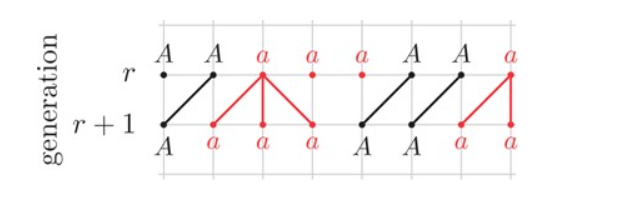

In a haploid population of constant size $ N $, parents are chosen via random sampling with replacement. The transition probability $ P_{ij} $, which is the probability that a population drifts from having $ i $ copies of an allele to having $ j $ copies in the next generation, is given by the formula

$$ P_{ij} = \binom{N}{j} \left( \frac{i}{N} \right)^j \left( \frac{N - i}{N} \right)^{N - j} $$

In other words, the probability of transitioning from an allele count of $i$, at generation $t - 1$, to an allele count of $j$, at generation $t$, can be computed from binomial probability mass function with size $N$ and success probability being equal to the frequency of the $A$ allele at time $t - 1$:

$$ X_t \mid X_{t-1} = x_{t-1} \sim \text{Binomial}(n = N, p = \frac{x_{t-1}}{N}) $$

In [93]:
num_simulations = 50
population_size =1000
initial_frequency=0.5
generations= 100

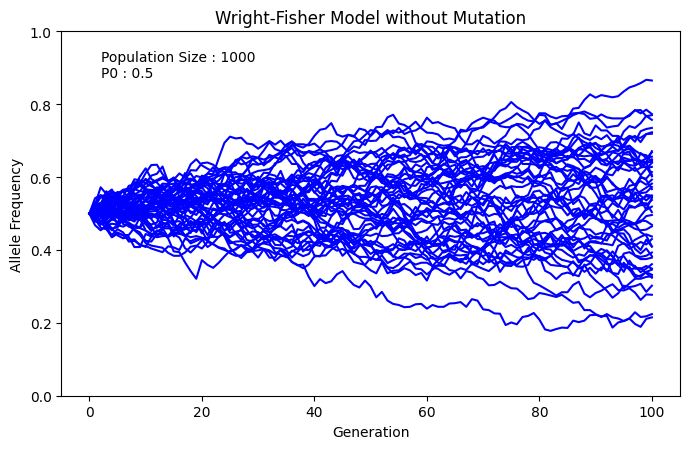

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_genetic_drift(population_size, generations, initial_frequency):
    """
    Simulate the Wright-Fisher model without mutation.
    """
    freq = initial_frequency
    frequencies = [freq]
    for _ in range(generations):
        freq = np.random.binomial(population_size, freq) / population_size
        frequencies.append(freq)
    return frequencies

frequencies_no_mutation = []
for _ in range(num_simulations):
    frequencies_no_mutation.append(simulate_genetic_drift(population_size, generations, initial_frequency))

# Plot the results
plt.figure(figsize=(7, 5))
for simulation in frequencies_no_mutation:
    plt.plot(simulation, color ="blue")

plt.title(f'Wright-Fisher Model without Mutation')
plt.text(2, 0.95, f'Population Size : {population_size}\nP0 : {initial_frequency}', 
         fontsize=10, verticalalignment='top')
plt.ylim(0, 1)
plt.xlabel('Generation')
plt.ylabel('Allele Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add padding for the super title
plt.show()


## Natural Mutation

<div style="width:50%; margin: auto;">

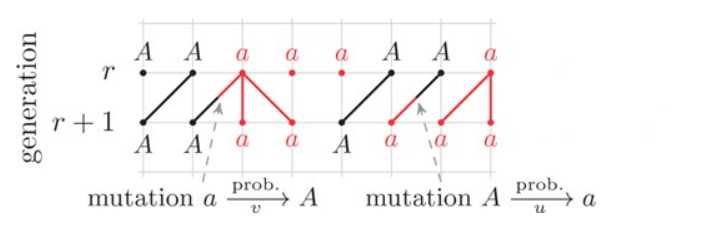

<div>



The most common way to introduce variation in a population is by allowing the alleles to mutate.
If $ u $ represents the probability of a mutation from allele $ A $ to $ a $, and $ v $ represents the probability of the reverse mutation, the sampling probability from the first equation is adjusted to account for the possibility of mutations occurring after selecting a parent. Consequently, an individual will carry the $ A $ allele if the parent had the $ A $ allele (with probability $ p $) and no mutation occurred (with probability $ 1 - u $), or if the parent had the $ a $ allele (with probability $ 1 - p $) and it underwent a mutation (with probability $ v $). This gives us a sampling probability of:

$$ p(1 - u) + (1 - p)v$$

In [96]:
%reset -f
num_simulations = 50
population_size =1000
initial_frequency=0.5
generations= 100
forward_mutation_rate= 0.08
reverse_mutation_rate= 0.01


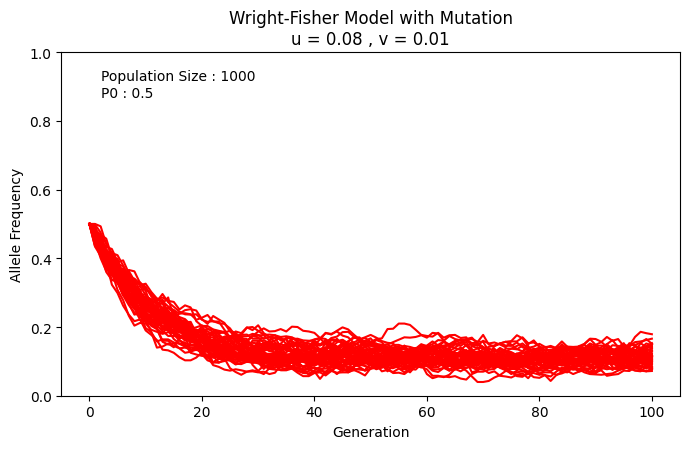

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_genetic_drift_with_mutation(population_size, generations, initial_frequency,
                                         forward_mutation_rate, reverse_mutation_rate):
    """
    Simulate the Wright-Fisher model with mutation.
    """
    freq = initial_frequency
    frequencies = [freq]
    for _ in range(generations):
        # Calculate the expected frequency of allele A after mutation
        expected_A = freq * (1 - forward_mutation_rate) + (1 - freq) * reverse_mutation_rate
        
        # Sample the frequency of allele A in the next generation
        freq = np.random.binomial(population_size, expected_A) / population_size
        
        # Update the frequency of allele A
        frequencies.append(freq)
    return frequencies


frequencies_with_mutation = []
for _ in range(num_simulations):
    frequencies_with_mutation.append(simulate_genetic_drift_with_mutation(population_size, generations, initial_frequency,
                                                                          forward_mutation_rate, reverse_mutation_rate))

# Plot the results
plt.figure(figsize=(7, 5))
for simulation in frequencies_with_mutation:
    plt.plot(simulation, color ="red")

plt.title(f'Wright-Fisher Model with Mutation\nu = {forward_mutation_rate} , v = {reverse_mutation_rate}')
plt.text(2, 0.95, f'Population Size : {population_size}\nP0 : {initial_frequency}', 
         fontsize=10, verticalalignment='top')
plt.ylim(0, 1)
plt.xlabel('Generation')
plt.ylabel('Allele Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add padding for the super title
plt.show()


### Wright Fisher Model class
The `WrightFisherModel` class is designed to simulate genetic drift, both with and without mutation, in a population over a specified number of generations. This class offers a structured and reusable way to conduct simulations of allele frequency changes over time, providing a more organized and modular approach compared to previous implementations.

#### Benefits of Using the `WrightFisherModel` Class

1. **Encapsulation**: The class encapsulates all the related attributes (e.g., population size, generations, mutation rates) and methods (e.g., simulations with and without mutation) within a single, cohesive unit. This makes the code easier to understand and maintain.

2. **Reusability**: By creating a class, the simulation logic is reusable. You can create multiple instances of the class with different parameters without duplicating code.

3. **Modularity**: The class structure allows for easy extension and modification. For example, if you want to add new methods or attributes, you can do so without affecting the rest of the code.

4. **Clarity**: Grouping related functions and data together in a class improves the clarity of the code. It becomes clear which functions operate on which data, and how the data is processed across different methods.

5. **Maintainability**: As the code base grows, having a class structure helps in maintaining and debugging the code. Changes to the simulation logic or parameters can be made in one place, reducing the risk of introducing bugs.

Here is the implementation of the `WrightFisherModel` class:


In [82]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
class WrightFisherModel:
    
    def __init__(self, population_size: int, generations: int, initial_frequency: float, 
                 forward_mutation_rate: float = 0, reverse_mutation_rate: float = 0) -> None:
        self.population_size = population_size
        self.generations = generations
        self.initial_frequency = initial_frequency
        self.forward_mutation_rate = forward_mutation_rate
        self.reverse_mutation_rate = reverse_mutation_rate
        self.allele_frequencies  = []
        
    def simulate_genetic_drift(self):
        """
        Simulate the Wright-Fisher model without mutation.
        """
        freq = self.initial_frequency
        frequencies = [freq]
        for _ in range(self.generations):
            freq = np.random.binomial(self.population_size, freq) / self.population_size
            frequencies.append(freq)
        self.allele_frequencies = frequencies
        return frequencies

    def simulate_genetic_drift_with_mutation(self):
        """
        Simulate the Wright-Fisher model with mutation.
        """
        freq = self.initial_frequency
        frequencies = [freq]
        for _ in range(self.generations):
            # Calculate the expected frequency of allele A after mutation
            expected_A = freq * (1 - self.forward_mutation_rate) + (1 - freq) * self.reverse_mutation_rate
            
            # Sample the frequency of allele A in the next generation
            freq = np.random.binomial(self.population_size, expected_A) / self.population_size
            
            # Update the frequency of allele A
            frequencies.append(freq)
        self.allele_frequencies = frequencies
        return frequencies


## simulation

The purpose of this Python script is to simulate different dynamics of the Wright-Fisher model to conduct various experiments and analyze the results. This simulation helps to understand the genetic drift in populations over generations, both with and without mutation, under various initial conditions and parameters.

#### 1. Importing Required Libraries and Class

First, we need to import the necessary libraries and the `WrightFisherModel` class. Ensure the class is defined or imported correctly.

#### 2. Defining the Main Function

The `main` function orchestrates the entire simulation. It sets up parameters locally and runs simulations for different population sizes and initial allele frequencies. It also manages the results and prepares them for plotting.
#### 3. Running Simulations

The `run_simulations` function runs multiple simulations for the given parameters. It uses the `WrightFisherModel` class to perform simulations either with or without mutation.
#### 4. Plotting the Simulations

The `plot_simulations` function visualizes the results of the simulations. It generates subplots for each combination of population size and initial frequency, displaying the allele frequency over generations.
#### 5. Running the Main Function

Finally, call the `main` function to execute the simulation and plotting.


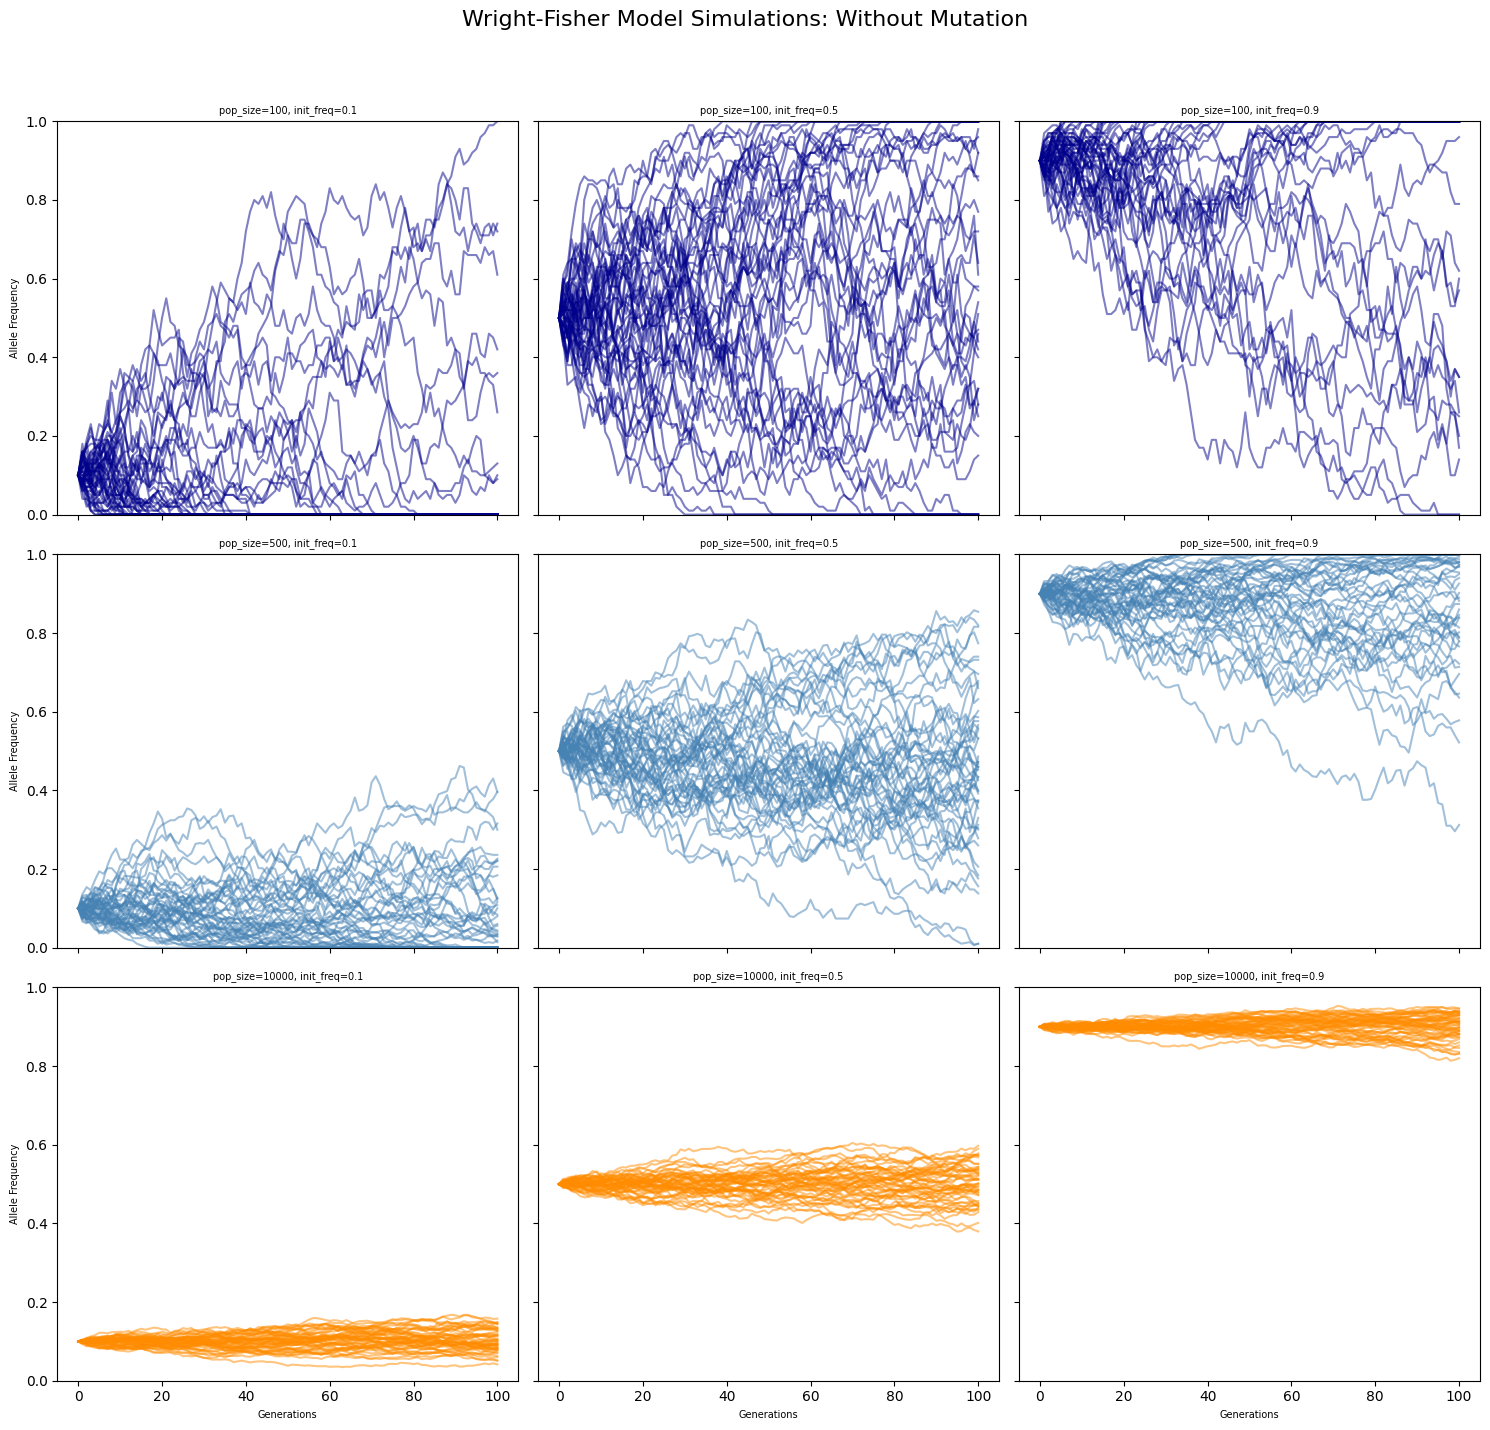

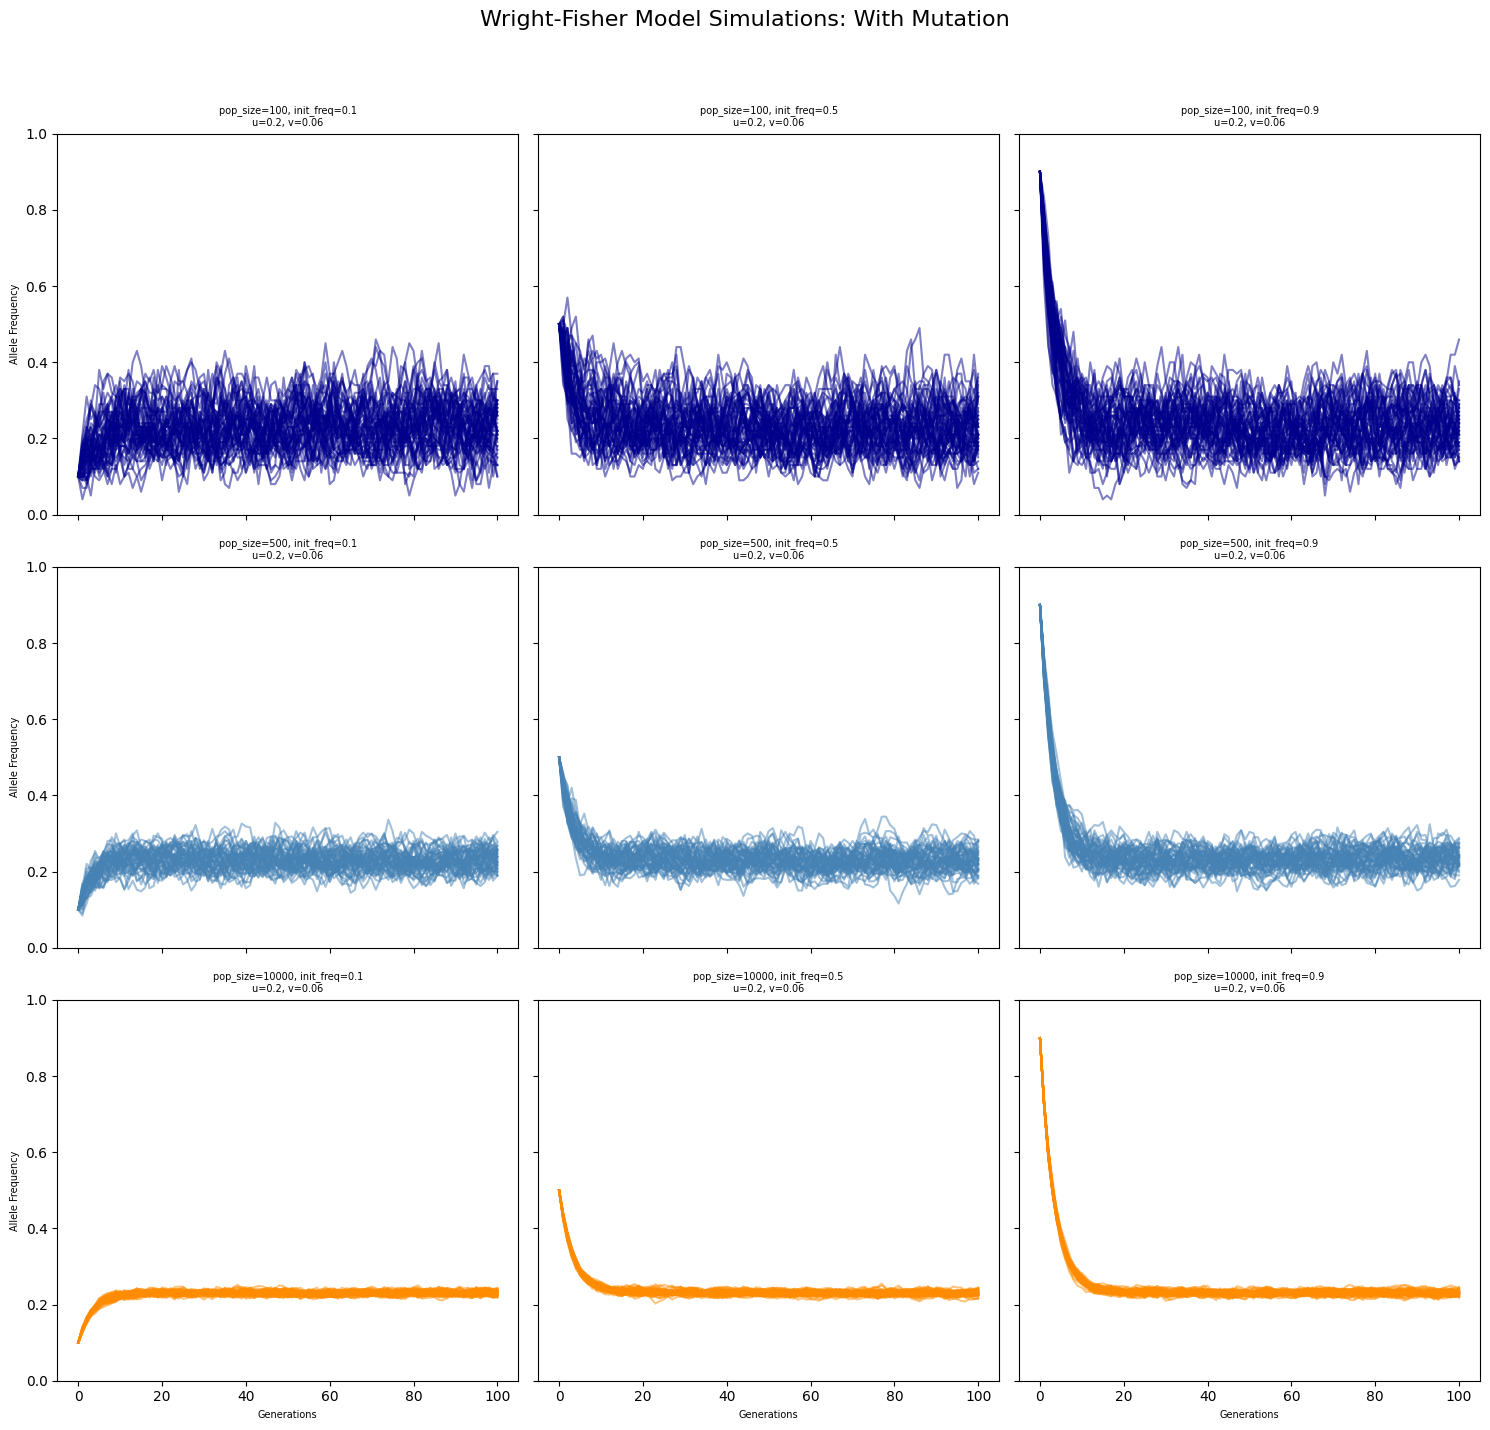

In [83]:
import matplotlib.pyplot as plt
from wright_fisher import WrightFisherModel  # Ensure this import matches your project structure
import matplotlib.cm as cm
import numpy as np
def main():
    # Configuration parameters set locally
    num_simulations = 50
    population_sizes = [100, 500, 10000]
    initial_frequencies = [0.1, 0.5, 0.9]
    generations = 100
    forward_mutation_rate = 0.2
    reverse_mutation_rate = 0.06

    all_simulations_drift = []
    all_simulations_mutation = []
    titles_drift = []
    titles_mutation = []
    population_colors = {}

    # Create a color map for the population sizes
    color_map = ['darkblue' , 'steelblue' , 'darkorange']

    for pop_size, color in zip(population_sizes, color_map):
        population_colors[pop_size] = color

    for population_size in population_sizes:
        for freq in initial_frequencies:
            simulations_drift = run_simulations(population_size, freq, forward_mutation_rate, reverse_mutation_rate, generations, num_simulations, mutation=False)
            simulations_mutation = run_simulations(population_size, freq, forward_mutation_rate, reverse_mutation_rate, generations, num_simulations, mutation=True)
            all_simulations_drift.append((simulations_drift, population_colors[population_size], population_size, freq))
            all_simulations_mutation.append((simulations_mutation, population_colors[population_size], population_size, freq))
            title_drift = f"pop_size={population_size}, init_freq={freq}"
            title_mutation = f"pop_size={population_size}, init_freq={freq}\nu={forward_mutation_rate}, v={reverse_mutation_rate}"
            titles_drift.append(title_drift)
            titles_mutation.append(title_mutation)

    plot_simulations(all_simulations_drift, titles_drift, population_sizes, initial_frequencies, "Without Mutation")
    plot_simulations(all_simulations_mutation, titles_mutation, population_sizes, initial_frequencies, "With Mutation")

def run_simulations(population_size, initial_frequency, forward_mutation_rate, reverse_mutation_rate, generations, num_simulations, mutation):
    simulations = []
    wf_model = WrightFisherModel(population_size, generations, initial_frequency, forward_mutation_rate, reverse_mutation_rate)
    for _ in range(num_simulations):
        if mutation:
            simulations.append(wf_model.simulate_genetic_drift_with_mutation())
        else:
            simulations.append(wf_model.simulate_genetic_drift())
    return simulations


def plot_simulations(all_simulations, titles, population_sizes, initial_frequencies, title_prefix):
    num_pop_sizes = len(population_sizes)
    num_init_freqs = len(initial_frequencies)
    
    # Adjust figsize to ensure square subplots
    fig, axs = plt.subplots(num_pop_sizes, num_init_freqs, figsize=(5 * num_init_freqs, 5 * num_pop_sizes), sharex=True, sharey=True)
    
    # Ensure axs is 2D array
    if num_pop_sizes == 1 and num_init_freqs == 1:
        axs = np.array([[axs]])
    elif num_pop_sizes == 1:
        axs = np.expand_dims(axs, axis=0)
    elif num_init_freqs == 1:
        axs = np.expand_dims(axs, axis=1)
    
    for (simulations, color, pop_size, init_freq), title in zip(all_simulations, titles):
        row = population_sizes.index(pop_size)
        col = initial_frequencies.index(init_freq)
        ax = axs[row, col]
        for sim in simulations:
            ax.plot(sim, alpha=0.5, color=color)
        ax.set_title(title, fontsize=7)
        ax.set_ylim(0, 1)
        if col == 0:
            ax.set_ylabel('Allele Frequency', fontsize=7)
        if row == num_pop_sizes - 1:
            ax.set_xlabel('Generations', fontsize=7)
        
    fig.suptitle(f'Wright-Fisher Model Simulations: {title_prefix}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add padding for the super title
    plt.show()
    
    
if __name__ == "__main__":
    main()


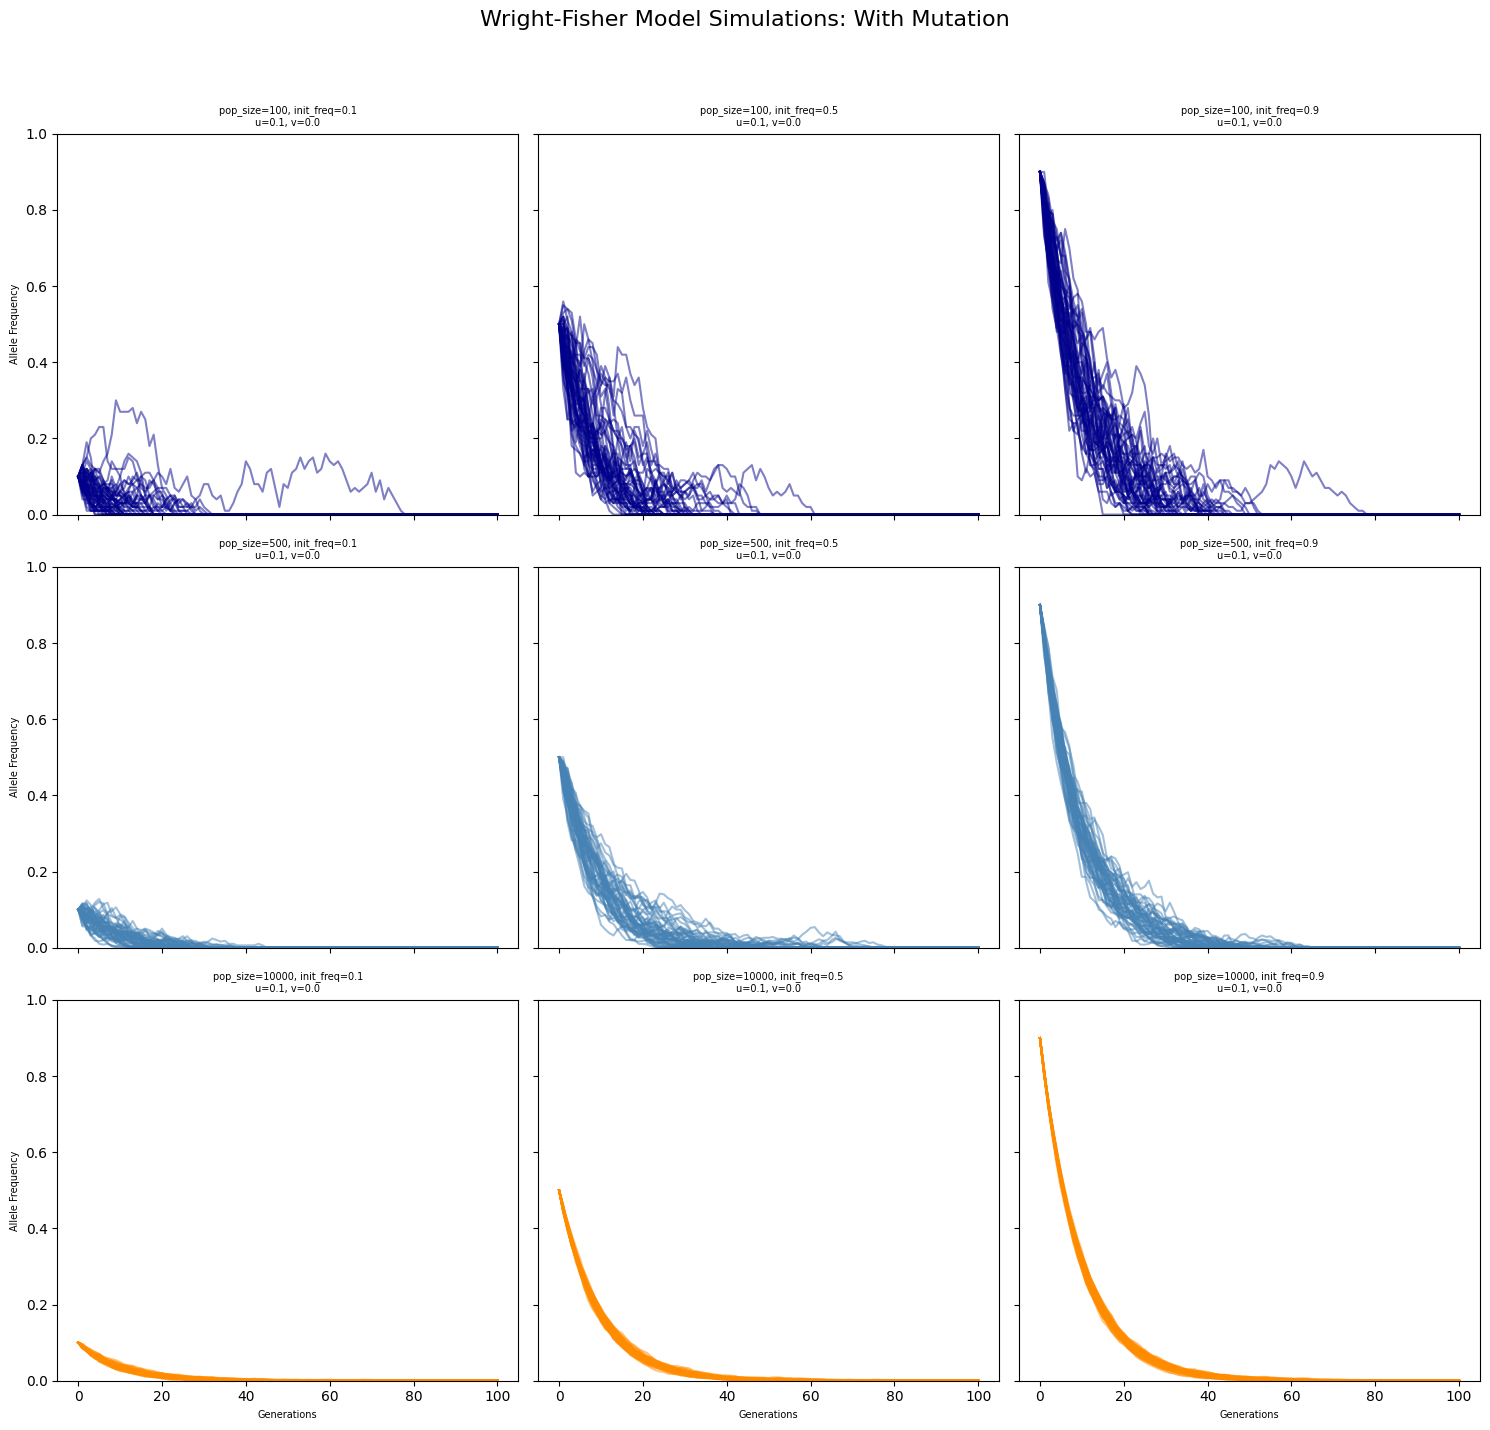

### Analysis of Wright-Fisher Model Simulations

In this section, we analyze the effect of changes in population size, initial allele frequency, and mutation rates on genetic drift and allele frequency dynamics in the Wright-Fisher model. We also discuss the concept of fixation, which is the point at which an allele becomes the only allele present at a particular genetic locus in a population.

#### 1. Effect of Population Size

Population size plays a crucial role in genetic drift. Smaller populations tend to experience more significant fluctuations in allele frequency due to the higher impact of random sampling effects. In contrast, larger populations tend to have more stable allele frequencies over generations due to the averaging out of random effects.

- **Small Population (e.g., 100)**: In small populations, allele frequencies fluctuate widely and can quickly drift to fixation (frequency of 0 or 1) within a few generations. Fixation happens because the smaller the population, the more likely random events can lead to one allele becoming predominant.
- **Medium Population (e.g., 500)**: In medium-sized populations, allele frequencies still fluctuate but are less likely to reach fixation quickly compared to small populations.
- **Large Population (e.g., 1000)**: In large populations, allele frequencies change more gradually, and the likelihood of reaching fixation within a given number of generations is lower. The larger the population, the more resistant it is to random fluctuations driving an allele to fixation.

#### 2. Effect of Initial Allele Frequency

The initial frequency of an allele influences its trajectory under genetic drift. An allele with an initial frequency close to 0 or 1 is more likely to drift to fixation at those extremes.

- **Low Initial Frequency (e.g., 0.1)**: Alleles with a low initial frequency have a high chance of drifting to a frequency of 0, especially in small populations. This means that the allele is likely to be lost from the population.
- **Medium Initial Frequency (e.g., 0.5)**: Alleles starting at an intermediate frequency have a balanced chance of drifting towards 0 or 1. This scenario exhibits the most significant fluctuations and demonstrates the randomness of genetic drift. The chances of fixation or loss are approximately equal.
- **High Initial Frequency (e.g., 0.9)**: Alleles with a high initial frequency are more likely to drift to a frequency of 1, particularly in small populations. This indicates that the allele is likely to become fixed in the population.

#### 3. Effect of Mutation Rates

Mutation introduces new genetic variation into the population. Forward mutation rate ($ u $) represents the probability of allele $ A $ mutating to $ a $, while reverse mutation rate ($ v $) represents the probability of $ a $ mutating back to $ A $.

- **Without Mutation**: Without mutation, genetic drift alone governs allele frequency changes. Allele frequencies can drift to fixation (0 or 1) purely by chance, and once fixed, they remain fixed. This results in a loss of genetic diversity over time.
- **With Mutation**: With mutation, allele frequencies are influenced by both drift and mutation. Mutation introduces new copies of alleles that might have been lost due to drift, maintaining genetic variation in the population. High mutation rates can counteract the effects of drift, preventing fixation and leading to stable allele frequencies over time. Mutation can therefore prevent the loss of genetic diversity and keep alleles at intermediate frequencies.

### Fixation

Fixation occurs when an allele becomes the only allele present at a particular genetic locus in a population, reaching a frequency of 1. The time to fixation depends on several factors:
- **Population Size**: Smaller populations reach fixation faster due to stronger genetic drift.
- **Initial Frequency**: Alleles with initial frequencies closer to 0 or 1 reach fixation faster.
- **Mutation Rates**: High mutation rates reduce the likelihood of fixation by continuously introducing genetic variation.

When considering a one-way mutation (e.g., only $ A $ to $ a $), the dynamic changes:
- **One-Way Mutation**: If mutation only occurs in one direction (e.g., $ A $ to $ a $), once $ a $ appears, it can increase in frequency over time, but no new $ A $ alleles are introduced. This leads to a potential fixation of $ a $ if the mutation rate is significant and genetic drift favors $ a $'s increase. In this scenario, $ A $ will eventually be lost from the population.

### Conclusion

Through these simulations of the Wright-Fisher model, we gain valuable insights into the dynamics of genetic drift, mutation, and fixation in populations:

1. **Population Size**: Smaller populations experience more dramatic allele frequency changes due to genetic drift, often leading to rapid fixation. Larger populations exhibit more gradual changes and are less likely to reach fixation quickly.
2. **Initial Allele Frequency**: Initial frequency affects the likelihood of an allele drifting to fixation. Frequencies closer to 0 or 1 tend to reach fixation more quickly.
3. **Mutation Rates**: Mutation maintains genetic variation by reintroducing alleles lost due to drift. The balance between drift and mutation rates determines long-term allele frequency dynamics, preventing fixation and promoting genetic diversity. However, one-way mutations can lead to the eventual loss of certain alleles and fixation of others.

Understanding these interactions is crucial for studies in population genetics, conservation biology, and evolutionary biology. The simulations highlight the delicate balance between genetic drift and mutation in shaping the genetic structure of populations over time. This balance is fundamental for maintaining genetic diversity, which is vital for the adaptability and survival of species.

